In [2]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow


In [3]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
# Location of the dataset
# Path for Ravdess dataset
ravdess = "datasets/RavdevsLow"
# Path for Savee dataset
savee = "datasets/Savee"
# Path for Tess dataset
tess = "datasets/TESS"
# Path for CREMA-D dataset
cremaD = "datasets/CremaD"
# Path for EVOV-DB
emoDB = "datasets/EMOV-DB"
# Path for JL
jl = "datasets/JL"
# Path for JL2
jl2 = "datasets/JL2"
# Path for IEMOCAP
iemocap = "datasets/IEMOCAP"
# Path for ML-END
mlEnd = "datasets/MLEnd"

In [5]:
def categorizeEmotion(emote):
    if emote == "neu":
        emote = "neutral"
    elif emote == "fru" or emote == "ang":
        emote = "angry"
    elif emote == "exc" or emote == "hap":
        emote = "happy"
    elif emote == "sur":
        emote = "surprise"
    elif emote == "dis":
        emote = "disgust"
    elif emote == "fea":
        emote = "fear"
    return emote

THis is for Iemocap. USE later

In [15]:
file_emotion = []
file_path = []
iemocap_directory_list = os.listdir(iemocap)

iemocap_data_from_excel = pd.read_excel("excelFiles/iemocap.xlsx")
fileAndEmotion = {}
for filename, fileEmotion in zip(iemocap_data_from_excel["id"], iemocap_data_from_excel["emotion"]):
    fileEmotion = categorizeEmotion(fileEmotion)
    fileAndEmotion[filename]=fileEmotion
for file in iemocap_directory_list:
    file = file.split(".")[0]
    for keys in fileAndEmotion:
        if file == keys and fileAndEmotion[keys]!= "xxx" and fileAndEmotion[keys]!="oth":
            file_emotion.append(fileAndEmotion[keys])
            file_path.append(iemocap+"/"+file+".wav")
emocount = {}
for emo in file_emotion:
    if emo in emocount:
        emocount[emo]+=1
    else:
        emocount[emo]=1
print(emocount)

file_path_df = pd.DataFrame(file_path,columns=["Path"])
file_emotion_df = pd.DataFrame(file_emotion,columns=["Emotions"])
iemocap_df = pd.concat([file_emotion_df,file_path_df],axis=1)
print(iemocap_df.shape)
iemocap_df.head()

{'neutral': 1702, 'angry': 2934, 'sad': 1062, 'happy': 1621, 'surprise': 107, 'fear': 40, 'disgust': 2}
(7468, 2)


,Emotions,Path
0,neutral,datasets/IEMOCAP/Ses01F_impro01_F000.wav
1,neutral,datasets/IEMOCAP/Ses01F_impro01_F001.wav
2,neutral,datasets/IEMOCAP/Ses01F_impro01_F002.wav
3,neutral,datasets/IEMOCAP/Ses01F_impro01_F005.wav
4,angry,datasets/IEMOCAP/Ses01F_impro01_F006.wav


FOR JL, use it later

In [16]:
jl_directory_list = os.listdir(jl)
file_emotion = []
file_path = []
emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]

for file in jl_directory_list:
    emotionName = file.split("_")[1]
    if emotionName == "anxious" or emotionName == "concerned":
        emotionName = "fear"
    elif emotionName == "apologetic":
        emotionName = "sad"
    elif emotionName == "excited":
        emotionName = "happy"
    for item in emotionList:
        if emotionName == item:
            file_emotion.append(emotionName)
            file_path.append(jl + "/" + file)
emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
path_df = pd.DataFrame(file_path, columns=["Path"])
jl_df = pd.concat([emotion_df, path_df], axis=1)
emotions = {}
for emo in jl_df["Emotions"]:
    if emo in emotions:
        emotions[emo] += 1
    else:
        emotions[emo] = 1
print(emotions)
print(jl_df.shape)
jl_df.head()

{'angry': 240, 'fear': 480, 'sad': 480, 'happy': 480, 'neutral': 240}
(1920, 2)


,Emotions,Path
0,angry,datasets/JL/female1_angry_10a_1.wav
1,angry,datasets/JL/female1_angry_10a_2.wav
2,angry,datasets/JL/female1_angry_10b_1.wav
3,angry,datasets/JL/female1_angry_10b_2.wav
4,angry,datasets/JL/female1_angry_11a_1.wav


FOR JL2, use it later

In [17]:
jl2_directory_list = os.listdir(jl2)
file_emotion = []
file_path = []
emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]
for folder in jl2_directory_list:
    subfolder = jl2 + "/" + folder
    surveyList = os.listdir(subfolder)
    for survey in surveyList:
        pages = subfolder + "/" + survey
        pageList = os.listdir(pages)
        for page in pageList:
            files = pages + "/" + page
            fileList = os.listdir(files)
            for file in fileList:
                if file == "cleaned":
                    continue
                elif file.startswith("Select"):
                    emotionName = file.split("_")[2]
                else:
                    emotionName = file.split("_")[1]
                if emotionName == "anxious" or emotionName == "concerned":
                    emotionName = "fear"
                elif emotionName == "apologetic":
                    emotionName = "sad"
                elif emotionName == "excited":
                    emotionName = "happy"
                for item in emotionList:
                    if emotionName == item:
                        file_emotion.append(emotionName)
                        file_path.append(files + "/" + file)
file_path.__len__()
emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
path_df = pd.DataFrame(file_path, columns=["Path"])
jl2_df = pd.concat([emotion_df, path_df], axis=1)
emotions= {}
for emo in jl_df["Emotions"]:
    if emo in emotions:
        emotions[emo] += 1
    else:
        emotions[emo] = 1
print(jl2_df.shape)
jl2_df.head()

(1952, 2)


,Emotions,Path
0,angry,datasets/JL2/main_emotion/main_survey_1/page1/...
1,happy,datasets/JL2/main_emotion/main_survey_1/page1/...
2,happy,datasets/JL2/main_emotion/main_survey_1/page1/...
3,neutral,datasets/JL2/main_emotion/main_survey_1/page1/...
4,sad,datasets/JL2/main_emotion/main_survey_1/page1/...


For EMO-DB, Use it later

In [18]:
emoDb_directory_list = os.listdir(emoDB)
file_emotion = []
file_path = []

for dir in emoDb_directory_list:
    parentFolder = emoDB + "/" + dir
    actorsList = os.listdir(parentFolder)
    for folders in actorsList:
        childFolder = parentFolder + "/" + folders
        files = os.listdir(childFolder)
        for item in files:
            part = item.split("_")
            if part[0].lower() == "anger":
                file_emotion.append("angry")
            elif part[0].lower() == "amused":
                file_emotion.append("surprise")
            else:
                file_emotion.append(part[0].lower())
            # file_emotion.append(part[0])
            file_path.append(childFolder + "/" + item)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
emoDB_df = pd.concat([emotion_df, path_df], axis=1)
# emoDB_df.to_excel("emo.xlsx",index=0)
print(emoDB_df.shape)
emoDB_df.head()


(5172, 2)


,Emotions,Path
0,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0001.wav
1,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0002.wav
2,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0003.wav
3,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0004.wav
4,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0005.wav


In [19]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    actor = os.listdir(ravdess + "/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head()
print(Ravdess_df.shape)


(1440, 2)


In [20]:
crema_directory_list = os.listdir(cremaD)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(cremaD + "/" + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.shape)


(7442, 2)


In [21]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.shape)
Tess_df.head()


(2800, 2)


,Emotions,Path
0,angry,datasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,datasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,datasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,datasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,datasets/TESS/OAF_angry/OAF_bean_angry.wav


In [22]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.shape)
Savee_df.head()

(480, 2)


,Emotions,Path
0,angry,datasets/Savee/DC_a01.wav
1,angry,datasets/Savee/DC_a02.wav
2,angry,datasets/Savee/DC_a03.wav
3,angry,datasets/Savee/DC_a04.wav
4,angry,datasets/Savee/DC_a05.wav


In [23]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df,emoDB_df, jl_df, jl2_df, iemocap_df], axis = 0)
# data_path = pd.concat([Crema_df, Tess_df, Savee_df], axis=0)
# data_path = pd.concat([Savee_df], axis=0)
# data_path = pd.concat([Ravdess_df,Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path_all.csv", index=False)
data_path.head()

,Emotions,Path
0,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-01...
1,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-02...
2,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-01...
3,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-02...
4,neutral,datasets/RavdevsLow/Actor_01/03-01-02-01-01-01...


In [26]:
emotionList = pd.read_csv("data_path_all.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
emotionCount=dict(sorted(emotionCount.items(), key=lambda x:x[0]))
print(emotionCount)

{'angry': 6609, 'disgust': 2944, 'fear': 2931, 'happy': 4512, 'neutral': 5649, 'sad': 3953, 'surprise': 2076}


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

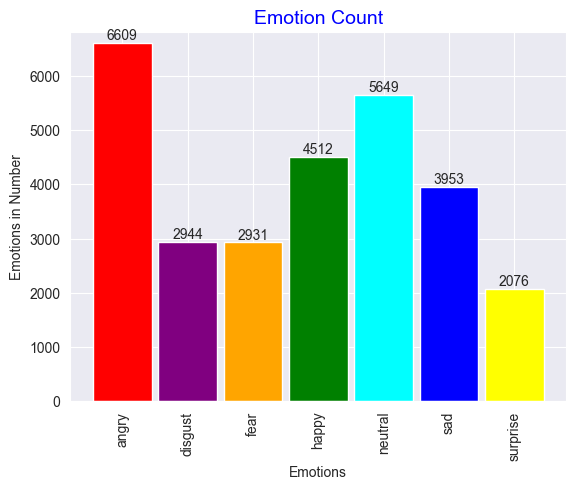

In [27]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red","purple","orange","green","cyan","blue","yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")
sorted(emotionCount)

# emotionCount.values()

# for index, value in enumerate(emotionCount)
# for index,value in enumerate(emotionCount.values()):
#     plt.text(value,index,value)
# plt.show()


In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


In [17]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


datasets/RavdevsLow/Actor_01/03-01-01-01-01-02-01.wav


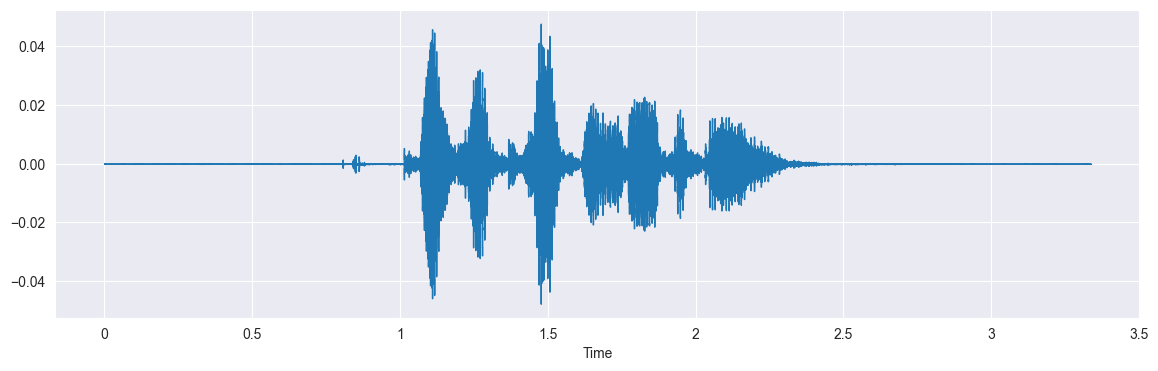

In [18]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)


In [19]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [20]:
# X, Y = [], []
# for path, emotion in zip(data_path.Path, data_path.Emotions):
#     try:
#         feature = get_features(path)
#     except:
#         print(path)
#         print(emotion)
#     for ele in feature:
#         try:
#             X.append(ele)
#             # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
#             Y.append(emotion)
#         except:
#             print(ele)

In [21]:
# len(X), len(Y), data_path.Path.shape

In [22]:
# Features = pd.DataFrame(X)
# Features['labels'] = Y
# Features.to_excel('features.xlsx', index=False)
# Features.head()


In [23]:
features_df = pd.read_excel("features_RTCS.xlsx")

In [24]:
featuresofit = np.asarray(features_df.iloc[:,:-1].values)
X = featuresofit
labelofit = np.asarray(features_df['labels'])
Y = labelofit

In [25]:
emotionsfromFeatures = features_df['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'angry': 5193, 'disgust': 5193, 'fear': 5193, 'happy': 5193, 'neutral': 4821, 'sad': 5193, 'surprise': 1380}


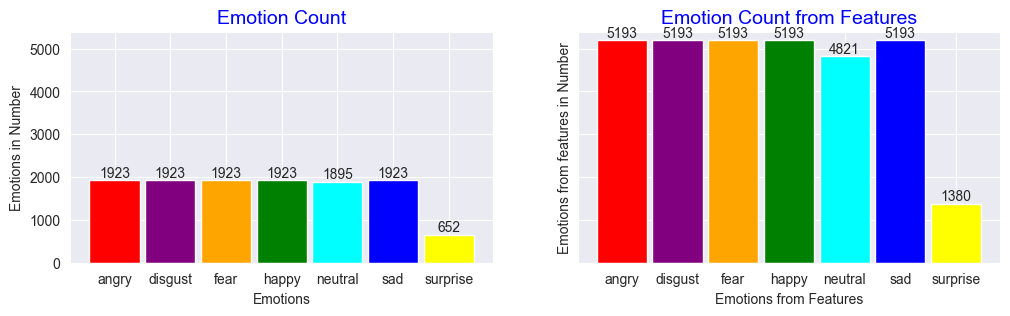

In [26]:
fig, (plt1,plt2) = plt.subplots(1,2,sharey=True, figsize=(12,3))
plt1.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red","purple","orange","green","cyan","blue","yellow"])
plt1.set_xlabel("Emotions")
plt1.set_ylabel("Emotions in Number")
plt1.set_title("Emotion Count", size=14, color="Blue")
plt1.set_ylim([0, max(emotionCount.values()) + 200])
# lst = []
for item in emotionCount:
    plt1.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")

plt2.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
        color=["red","purple","orange","green","cyan","blue","yellow"])
plt2.set_xlabel("Emotions from Features")
plt2.set_ylabel("Emotions from features in Number")
plt2.set_title("Emotion Count from Features", size=14, color="Blue")
plt2.set_ylim([0, max(emotionCountfromFeatures.values()) + 200])
# lst = []
for item in emotionCountfromFeatures:
    plt2.text(item, emotionCountfromFeatures[item],
             emotionCountfromFeatures[item], ha="center", va="bottom")
# plt2.subplots(nrows=1,ncols=2)

In [27]:
# X = Features.iloc[:, :-1].values
# Y = Features['labels'].values
# y_labels = Y

In [28]:
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# pd.DataFrame(Y)

((28949, 162), (28949,), (3217, 162), (3217,))

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28949, 162), (28949,), (3217, 162), (3217,))

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [31]:
kernelchoice = ["rbf"]
C_choice = [150,200,250,300,350]
import random

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

for i in C_choice:
    a=random.choice(kernelchoice)
    b=random.choice(C_choice)
    classifier = svm.SVC(kernel='linear', gamma="auto", C=b)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    accuracyPercent = accuracy_score(y_test, y_predict) * 100
    print("Kernel:  "+ str(a) + "  ||  "+" C: " + str(b) +"  ||  Accuracy"+ "  :  " + str(accuracyPercent))

In [ ]:
print(classification_report(y_test, y_predict))